###STATISTICS FOR DATA SCIENCE
*Interpreting Insight Through Statistics*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"E:\MINE\beasiswa\2022\DATA BANGLORE\ON BOARDING\EXAM + TASK\6 - STATISTIC FOR DATA SCIENCE\sample_submission.csv")
df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


#####Checking Data Condition

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [ ]:
df.isnull().sum()

Id           0
SalePrice    0
dtype: int64

#####Interpreting Data Through Descriptive Statistics

In [ ]:
hargaRumah = df[['SalePrice']]
hargaRumah.describe()

,SalePrice
count,1459.000000
mean,179183.918243
std,16518.303051
min,135751.318893
25%,168703.011202
50%,179208.665698
75%,186789.409363
max,281643.976117


In [ ]:
hargaRumah.mode()

,SalePrice
0,174126.297156
1,174388.867433


In [ ]:
hargaRumah.var()

SalePrice    2.728543e+08
dtype: float64

In [ ]:
hargaRumah.quantile(0.75) - hargaRumah.quantile(0.25)

SalePrice    18086.398162
dtype: float64

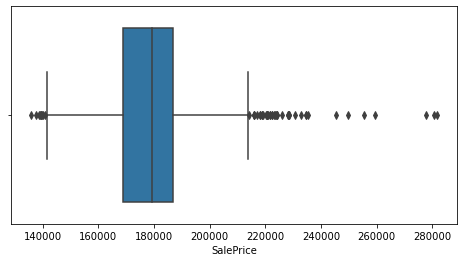

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x="SalePrice", data=hargaRumah)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

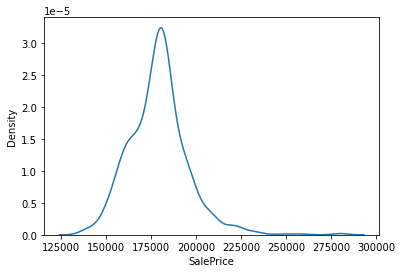

In [ ]:
sns.distplot(hargaRumah["SalePrice"], hist = False)

Interpretasi:
1. Diketahui pada data nilai median lebih besar dari modus,  
   oleh karena itu distribusi data memiliki skew positif, menandakan bahwa pada 
   data terdapat Outlier yang harus di handle, baik outlier berupa 
   minimum value maupun maximum value.
2. Pada gambar, terlihat pula bahwa grafik cenderung lancip menandakan distribusi data tidak merata dan terdapat indikasi outlier dalam intensitas yang banyak
3. Nilai jangkauan pada data yakni 18086.398162 yang merepresentasikan 50% range nilai pada data
4. Data tersebut termasuk ke dalam jenis data yang memiliki varian walaupun dengan intensitas yang minim, yang dapat dilihat dari nilai standar deviasi yang lebih kecil dari mean

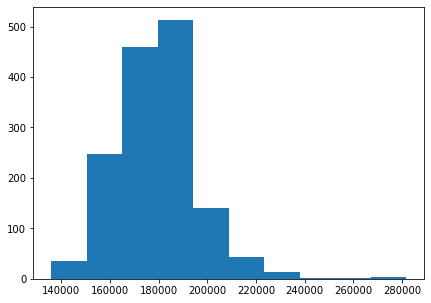

In [ ]:
#Histogram Plot
plt.figure(figsize=(7,5))
plt.hist(hargaRumah["SalePrice"])
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

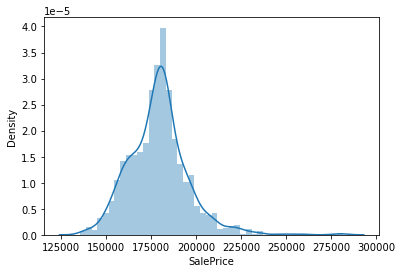

In [ ]:
sns.distplot(hargaRumah["SalePrice"])

<Figure size 1080x1800 with 0 Axes>

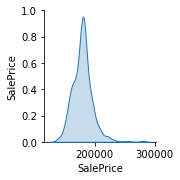

In [ ]:
plt.figure(figsize=(15,25))
sns.pairplot(hargaRumah, diag_kind="kde")

Tranformasi data:
1. Jenis distribusi pada data diketahui memiliki skew positif, salah satu cara untuk handle data dapat dengan mengeliminasi 
   outlier.
2. Pada data diketahui tidak terdapat missing value sehingga tidak diperlukan adanya handling missing data, melainkan 
   dibutuhkan proses transformasi data termasuk handling outlier salah satunya dengan cara scalling. 
3. Menganalisa data yang memiliki skew, *sangat disarankan tidak menggunakan MEAN* karena MEAN memiliki sifat not robust atau 
   sensitif dengan data yang memiliki outlier, sehingga proses analisis dapat menggunakan median karena *median bersifat 
   robust*. 

#####Example of How to do Hypothesis Testing

In [ ]:
#Example of How to Take Data Sampling 
hargaRumah.shape

(1459, 1)

In [ ]:
#margin of error = 0.05
k = 1459/(1+1459*0.05**2)
k

313.93222162452923

In [ ]:
Sample_hR = hargaRumah.sample(314)
Sample_hR

,SalePrice
1092,165956.259265
1411,148217.262541
1351,178498.634450
111,178425.956139
355,159650.304286
...,...
750,163081.025723
692,181416.732376
890,168538.969496
1275,182997.570116


###### Statement 1 : apakah data 'hargaRumah' berdistribusi normal ?
H0 = Data 'hargaRumah' berdistribusi normal

H1 = Data 'hargaRumah' *tidak* berdistribusi normal

In [ ]:
#Performing the Normality Test with Sharpio method
from scipy.stats import shapiro
stat, Pvalue= shapiro(hargaRumah)
print("stat=%.2f, p=%.2f" % (stat, p))

if Pvalue > 0.05 :
    print("Data Berdistribusi Normal") #Menolak H1
else :
    print("Data Tidak Berdistribusi Normal") #Menolak H0

stat=0.95, p=0.00
Data Tidak Berdistribusi Normal


###### Statement 2 : apakah data 'Sample_hR' berdistribusi normal ?
H0 = Data 'Sample_hR' berdistribusi normal

H1 = Data 'Sample_hR' *tidak* berdistribusi normal

In [ ]:
#Performing the Normality Test with Sharpio method
from scipy.stats import shapiro
stat, Pvalue= shapiro(Sample_hR)
print("stat=%.2f, p=%.2f" % (stat, p))

if Pvalue > 0.05 :
    print("Data Berdistribusi Normal") #Menolak H1
else :
    print("Data Tidak Berdistribusi Normal") #Menolak H0

stat=0.98, p=0.00
Data Tidak Berdistribusi Normal
